# Titile: Stroke Prediction

A brief information about the features are given below
* id: Identification number of the individual.
* gender: Gender of the individual.
* hypertension: Health related parameter, does person have hypertension.
* heart_disease: Health related parameter, does person have heart disease.
* ever_married: Personal information, is person married on not?
* work_type: Nature of work place.
* Residence_type: Residence type of the individual.
* avg_glucose_level: average glucose level in blood for the individual.
* bmi: body mass index of the individual.
* smoking_status: Habitual information. Current smoking status of individual.
* stroke: Our target, is person suffered heart attack


In [1]:
# importing libraries for EDA and preprocessing

import numpy as np
import pandas as pd
#from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


In [3]:
df=pd.read_csv('drive/MyDrive/Colab Notebooks/stroke_data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape
# Observation: There are 5110 rows and 12 columns in the dataset.

(5110, 12)

In [6]:
# drop features that are not required, then get statistics of numerical attributes
df.drop(['id'],axis=1).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#describe categorical features 
df.describe(exclude=['float','int64'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
#count missing values of each attributes. If any, that need to be deal before modeling
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only bmi column has certain missing values.

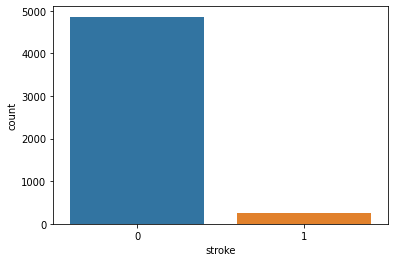

In [12]:
df['stroke'].value_counts()
sns.countplot(x='stroke',data=df)
#the dataset is imbalanced, data points having stroke(1) is 249 whereas not having stroke(0) is large in numbers(4861).

In [4]:
#remove irrelevent column, here id can be removed
df.drop(['id'],axis=1,inplace=True)

# **Data Visulaization**

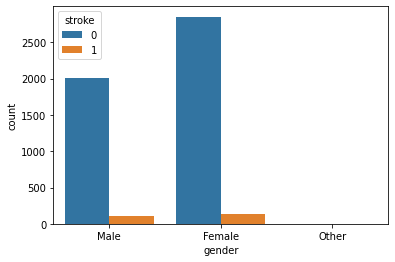

In [14]:
#coutplot from seaborn can be used for basic EDA
#Count Plot of Categorical feature 
sns.countplot(x='gender',hue='stroke',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stroke / Hypertension')

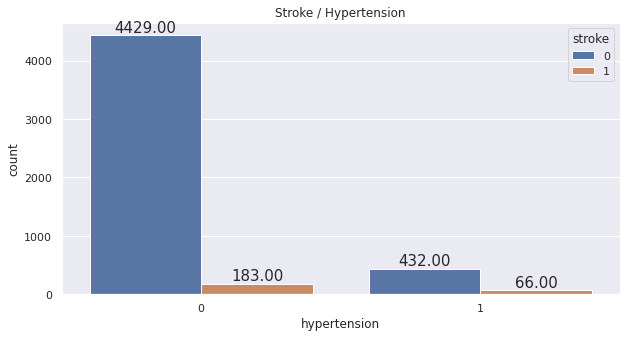

In [17]:
sns.set(rc={'figure.figsize':(10,5)})
h_plot = sns.countplot('hypertension',hue='stroke',data=df)
for p in h_plot.patches:
  h_plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                  p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Stroke / Hypertension')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stroke / Heart Disease')

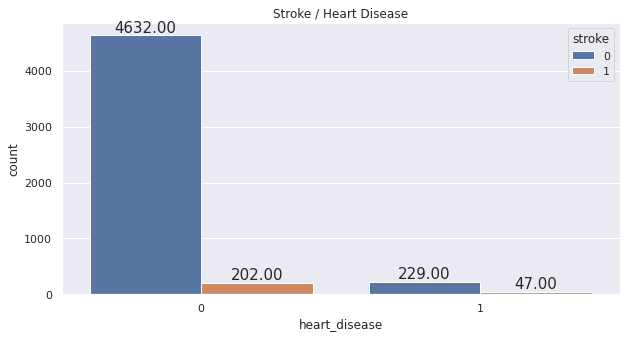

In [18]:
hd_plot = sns.countplot('heart_disease',hue='stroke',data=df)
for p in hd_plot.patches:
  hd_plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                  p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
plt.title('Stroke / Heart Disease')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stroke / Married or not')

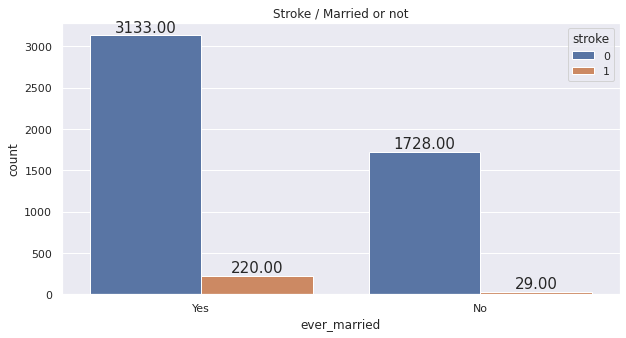

In [19]:
m_plot = sns.countplot('ever_married',hue='stroke',data=df)
for p in m_plot.patches:
  m_plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                  p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
plt.title('Stroke / Married or not')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stroke / Work types')

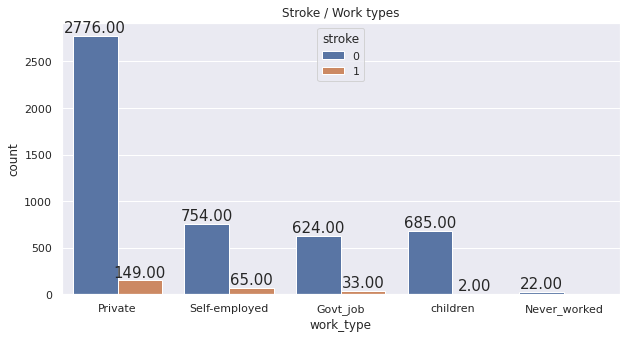

In [20]:
w_plot = sns.countplot('work_type',hue='stroke',data=df)
for p in w_plot.patches:
  w_plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                  p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
plt.title('Stroke / Work types')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stroke / Residence type')

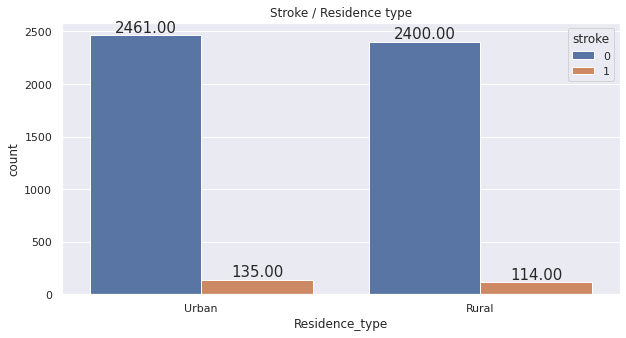

In [21]:
R_plot = sns.countplot('Residence_type',hue='stroke',data=df)
for p in R_plot.patches:
  R_plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                  p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
plt.title('Stroke / Residence type')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stroke / Smoking status')

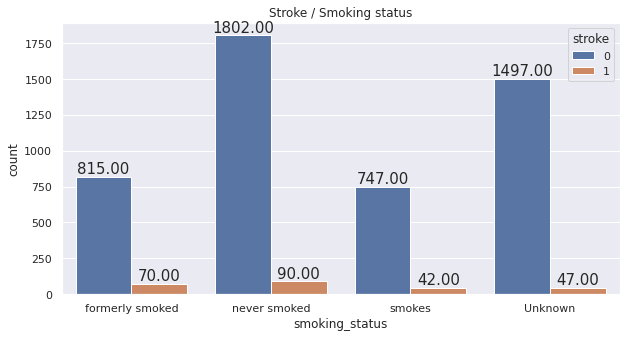

In [22]:
s_plot = sns.countplot('smoking_status',hue='stroke',data=df)
for p in s_plot.patches:
  s_plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                  p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
plt.title('Stroke / Smoking status')

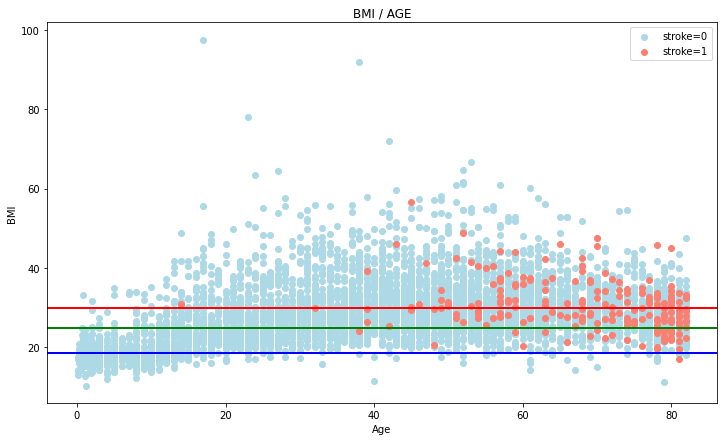

In [8]:

plt.figure(figsize=(12, 7))
plt1=plt.scatter(df.age[df.stroke==0],df.bmi[df.stroke==0],c="lightblue") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt2=plt.scatter(df.age[df.stroke==1], df.bmi[df.stroke==1], c="salmon") # axis always come as (x, y)

# Add some helpful info
plt.axhline(y=24.9, linewidth=2, color='g', ls='-')
plt.axhline(y=18.5, linewidth=2, color='b', ls='-')
plt.axhline(y=29.9, linewidth=2, color='r', ls='-')
plt.title("Stroke in function of Age and Hyper tension(BMI)")
plt.ylabel('BMI')
plt.xlabel('Age')
plt.title('BMI / AGE')
plt.legend((plt1,plt2),('stroke=0','stroke=1'))
plt.show()

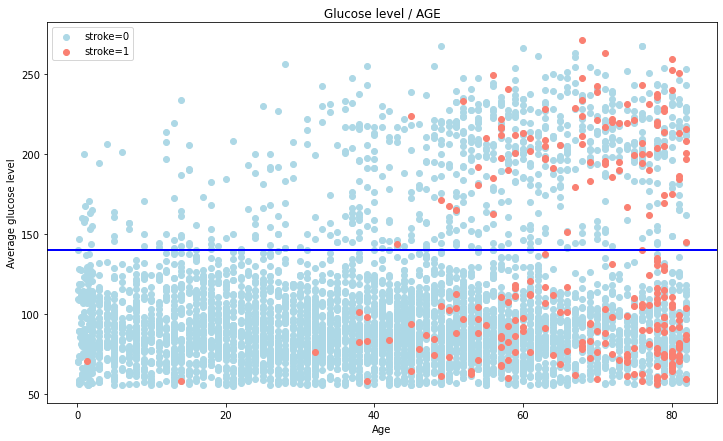

In [9]:
plt.figure(figsize=(12, 7))
plt1=plt.scatter(df.age[df.stroke==0],df.avg_glucose_level[df.stroke==0],c="lightblue") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt2=plt.scatter(df.age[df.stroke==1], df.avg_glucose_level[df.stroke==1], c="salmon") # axis always come as (x, y)

# Add some helpful info
plt.title("Stroke in function of Age and average Glucose level")
plt.ylabel('Average glucose level')
plt.xlabel('Age')
plt.title('Glucose level / AGE')
plt.legend((plt1,plt2),('stroke=0','stroke=1'))
plt.axhline(y=140, linewidth=2, color='b', ls='-')
plt.show()

In [25]:
len(df[(df['avg_glucose_level']>140)])

821

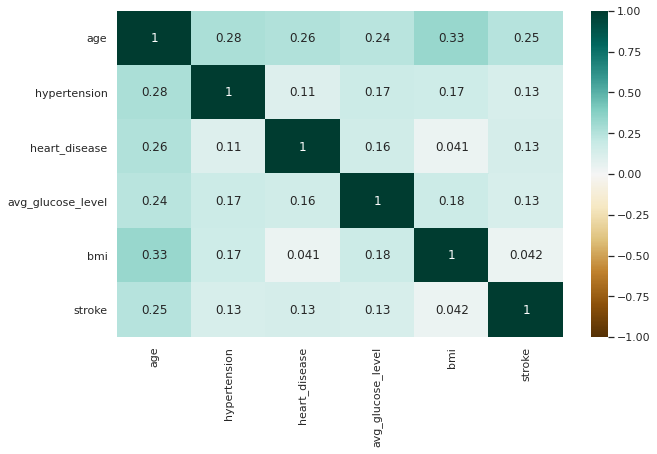

In [26]:
#correlation matrix
plt.figure(figsize=(10, 6))

heatmap=sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')

Preprocessing


In [5]:
#filling missing values in bmi column with its mean
df.fillna(value=df['bmi'].mean(),inplace=True)

Dummies

It is always better to convert categorical variables into numeric format because machine learning algorithms can't interpret words. 


In [6]:
#importing OneHotEncoder for encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded =  pd.DataFrame(ohe.fit_transform(df[['gender','ever_married','work_type',
                       'Residence_type','smoking_status']]).toarray())
df=pd.concat([df,encoded],axis=1)

In [29]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],inplace=True,axis=1)

In [8]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,67.0,0,1,228.69,36.600000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,28.893237,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.500000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.400000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.000000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
#scaling of numerical variables
from sklearn.preprocessing import StandardScaler
features= df[['age','hypertension','heart_disease','avg_glucose_level','bmi']]
features=pd.DataFrame(StandardScaler().fit_transform(features),index=features.index,columns=features.columns)
#col=df[['BAD','REASON','JOB']]
df.drop(['age','hypertension','heart_disease','avg_glucose_level','bmi'],axis=1,inplace=True)
df=pd.concat([features,df],axis=1)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.051434,-0.328602,4.185032,2.706375,1.001234e+00,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.786070,-0.328602,-0.238947,2.121559,1.384666e-15,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.626390,-0.328602,4.185032,-0.005028,4.685773e-01,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.255342,-0.328602,-0.238947,1.437358,7.154182e-01,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.582163,3.043196,-0.238947,1.501184,-6.357112e-01,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,3.043196,-0.238947,-0.494658,1.384666e-15,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,1.670617,-0.328602,-0.238947,0.420775,1.442949e+00,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,-0.363842,-0.328602,-0.238947,-0.511443,2.217363e-01,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,0.343796,-0.328602,-0.238947,1.328257,-4.278451e-01,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Handling imbalance data using resampling based techniques, here we are using oversampling


In [10]:
class_0,class_1 = df.stroke.value_counts()

# Divide by class
df_class_0 = df[df['stroke'] == 0]
df_class_1 = df[df['stroke'] == 1]

df_class_1_over = df_class_1.sample(class_0, replace=True)
df_final = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_final.stroke.value_counts())

Random over-sampling:
1    4861
0    4861
Name: stroke, dtype: int64


In [11]:
#splitting dataset into train and test data
from sklearn.model_selection import train_test_split
X=df_final.drop(['stroke'],axis=1)
Y=df_final['stroke']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=30)

Building models

Importing models and neccessory metrics for validation of trained model



Results for Logistic Regression

Confusion matrix:

 [[711 243]
 [190 801]] 

Classification report:

               precision    recall  f1-score   support

           0       0.79      0.75      0.77       954
           1       0.77      0.81      0.79       991

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945


Accuracy Score:  0.7773778920308483


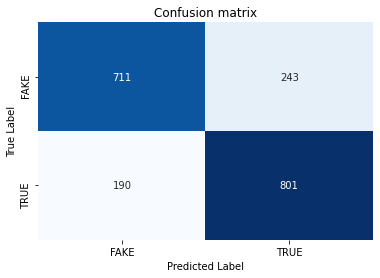

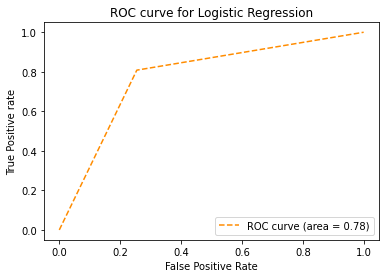


Results for K-Nearest Neighbors

Confusion matrix:

 [[813 141]
 [  0 991]] 

Classification report:

               precision    recall  f1-score   support

           0       1.00      0.85      0.92       954
           1       0.88      1.00      0.93       991

    accuracy                           0.93      1945
   macro avg       0.94      0.93      0.93      1945
weighted avg       0.94      0.93      0.93      1945


Accuracy Score:  0.9275064267352185


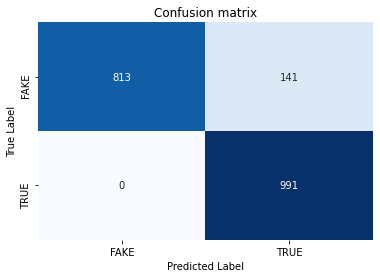

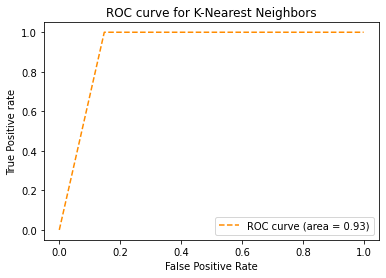


Results for Random Forest Classifier

Confusion matrix:

 [[944  10]
 [  0 991]] 

Classification report:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99       954
           1       0.99      1.00      0.99       991

    accuracy                           0.99      1945
   macro avg       1.00      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945


Accuracy Score:  0.9948586118251928


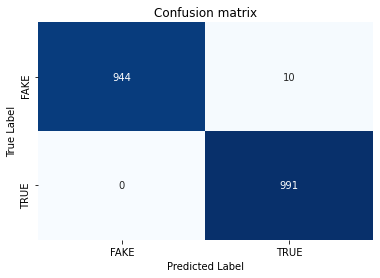

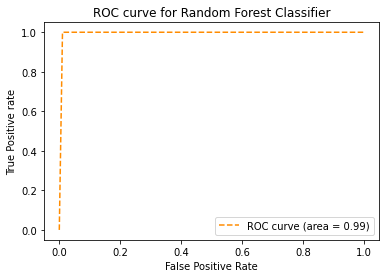

In [28]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc,accuracy_score
models = [['Logistic Regression',LogisticRegression(max_iter=200)],['K-Nearest Neighbors',
                                      KNeighborsClassifier()],['Random Forest Classifier',RandomForestClassifier()]]

results = {}

for i in range(0,len(models)):
  classifier = models[i][1]
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  y_prob = classifier.predict_proba(x_test)[:,1]

  print(f'\nResults for {models[i][0]}\n')
  print('Confusion matrix:\n\n', confusion_matrix(y_test, y_pred), '\n')
  print('Classification report:\n\n', classification_report(y_test, y_pred))
  print("\nAccuracy Score: ",accuracy_score(y_test, y_pred))

  #confusiin matrix
  cm=confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'],cmap=plt.cm.Blues, cbar=False)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion matrix')
  plt.show()

  #ROC curve
  fpr,tpr,thresh = roc_curve(y_test,y_pred,pos_label=1)
  plt.plot(fpr, tpr, linestyle='--',color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  # title
  plt.title(f'ROC curve for {models[i][0]}')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')
  plt.legend(loc="lower right")
  plt.show()
